## Short summary of supervised learning with Sklearn

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.datasets import make_blobs

### KNN
**important param**: numbers of neighbors and how to measure distance(usually Euclidean)

model is more complicated with **fewer num neighbors**

**strength**: easy to understand, give reasonable performance without a lot of adjustments.

**weakness**: not good when training set is large, when data has many features or when data is sparse(has a lof of 0 in feaures)

array([[0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ]])

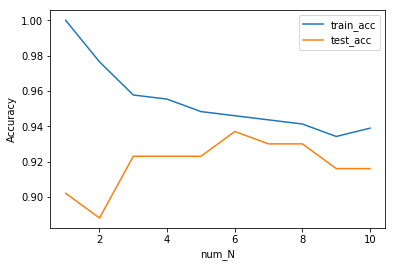

In [18]:
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,
                                                 stratify=cancer.target,random_state=66)
train_acc = []
test_acc=[]
num_N=range(1,11)
for n in num_N:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train,y_train)
    train_acc.append(clf.score(X_train,y_train))
    test_acc.append(clf.score(X_test,y_test))
plt.plot(num_N,train_acc,label='train_acc')
plt.plot(num_N,test_acc,label='test_acc')
plt.xlabel('num_N')
plt.ylabel('Accuracy')
plt.legend()

clf.predict(X_test[0:7])
clf.predict_proba(X_test[0:7])

## Linear models
**stregths**: fast to train and predict. Easy to understand how a prediction is made. Works well with sparse data or large dataset.

**weakness**: coef may be hard to interpret. Not well when there is no linear relationship. Perform well when # features is large compared to the # samples. Other methods may yield better generalization performance with lower-dimensional spaces.
### linear regression
**minimize MSE** loss = sum[(yi-yi_hat)^2]

**Ridge (L2) regularization**: loss = sum[(yi-yi_hat)^2] + alpha*sum[w^2]

**Lasso (L1) regularization** loss = sum[(yi-yi_hat)^2] + alpha*sum|w| force coef to zero, auto feature selection

**High alpha: more regularization**
### linear classification
**logistic regression and linear SVM**

**minimize: loss** = C*clf_loss + L2 norm/margin_loss

**parameter C:** the emphasize on fit the data. Focus more on margin (heavier regularization) with smaller C and focus on correctly classify each individual data with larger C.

**multiclass clf** one vs. all. One linear model for each class which separates that class from the rest.

Coef: 
 [8.48918875]
train score: 0.42
test score: 0.67


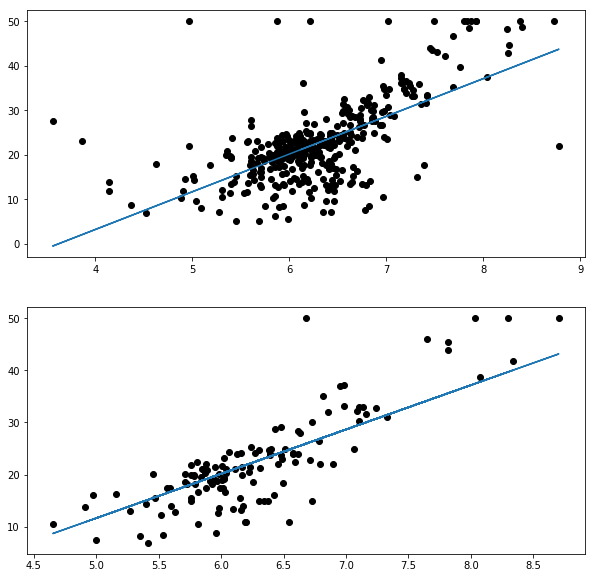

In [57]:
from sklearn.linear_model import LinearRegression
boston=load_boston()
X = boston.data[:, np.newaxis, 5] # use only one feature

X_train,X_test,y_train,y_test = train_test_split(X,boston.target,
                                                random_state=66)
lr = LinearRegression()
lr.fit(X_train,y_train)
print('Coef: \n',lr.coef_)
print('train score: {:.2f}'.format(lr.score(X_train,y_train)))
print('test score: {:.2f}'.format(lr.score(X_test,y_test)))

y_hat = lr.predict(X_train)
y_pred=lr.predict(X_test)
plt.subplots(2,1,figsize=(10,10))
plt.subplot(211)
plt.scatter(X_train,y_train,color='black',label='train')
plt.plot(X_train,y_hat,'-')


plt.subplot(212)
plt.scatter(X_test,y_test,color='black',label='test')
plt.plot(X_test,y_pred,'-')

In [60]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,
                                                random_state=66)
lr = LinearRegression()
lr.fit(X_train,y_train)
print('Coef: \n',lr.coef_)
print('intercept:\n', lr.intercept_)
print('R2 train score: {:.2f}'.format(lr.score(X_train,y_train)))
print('R2 test score: {:.2f}'.format(lr.score(X_test,y_test)))

y_pred=lr.predict(X_test)

Coef: 
 [-1.20479243e-01  4.88212582e-02  2.79193862e-02  2.13540591e+00
 -1.92657528e+01  3.24805115e+00 -4.95897277e-03 -1.66157655e+00
  2.96647072e-01 -1.19849170e-02 -9.94845386e-01  8.49563938e-03
 -5.42334557e-01]
intercept:
 43.15225443330815
R2 train score: 0.71
R2 test score: 0.82


In [67]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,
                                                random_state=66)
lr = Ridge(alpha=10).fit(X_train,y_train)
print('Coef: \n',lr.coef_)
print('intercept:\n', lr.intercept_)
print('R2 train score: {:.2f}'.format(lr.score(X_train,y_train)))
print('R2 test score: {:.2f}'.format(lr.score(X_test,y_test)))

y_pred=lr.predict(X_test)

Coef: 
 [-0.11035869  0.05343057 -0.04091212  1.4509453  -2.05443645  3.11958421
 -0.01623356 -1.39715096  0.27408182 -0.01468607 -0.80674493  0.00848818
 -0.58419694]
intercept:
 33.26967359881763
R2 train score: 0.70
R2 test score: 0.81


In [72]:
from sklearn.linear_model import Lasso
lr = Lasso(alpha=1).fit(X_train,y_train)
print('Coef: \n',lr.coef_)
print('intercept:\n', lr.intercept_)
print('R2 train score: {:.2f}'.format(lr.score(X_train,y_train)))
print('R2 test score: {:.2f}'.format(lr.score(X_test,y_test)))

print('num of features used: {}'.format(np.sum(lr.coef_!=0)))

Coef: 
 [-0.05023553  0.04952053 -0.          0.         -0.          0.51743439
  0.01551993 -0.75023731  0.2303442  -0.0147793  -0.69879894  0.00542233
 -0.7798394 ]
intercept:
 45.41851695533835
R2 train score: 0.65
R2 test score: 0.72
num of features used: 10


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,
                                                 stratify=cancer.target,random_state=66)
logreg=LogisticRegression().fit(X_train,y_train)
print('train acc score:{:.3f}'.format(logreg.score(X_train,y_train)))
print('test acc score:{:.3f}'.format(logreg.score(X_test,y_test)))

train acc score:0.972
test acc score:0.937


In [77]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
l_svm = LinearSVC().fit(X,y)
print('Coef shape', l_svm.coef_.shape)
print('Intercept shape', l_svm.intercept_.shape)

Coef shape (3, 2)
Intercept shape (3,)


## Naive Bayes Classifier
**strength**: faster to train and predict, even faster than linear model. Training is easy to understand. works well with high dimentional sparse data

**weakness**: since it **treats each feature independently**, may be slightly worse than other methods if the assumption doesn't hold

## Decision Trees
**prevent overfitting**: pre-pruning: limit max depth, max number of leaves, require min number points to split. post-pruning: collaps nodes that contain little information.

**strength**: results can be easily visualized and understood. Splits of data don't depends on scaling. Works well when features are on completely different scales or mixed of features

**weakness**: tend to overfit

In [79]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state = 66)
tree.fit(X_train, y_train)
print('acc on train: {:.3f}'.format(tree.score(X_train,y_train)))
print('acc on test: {:.3f}'.format(tree.score(X_test,y_test)))

acc on train: 0.986
acc on test: 0.916


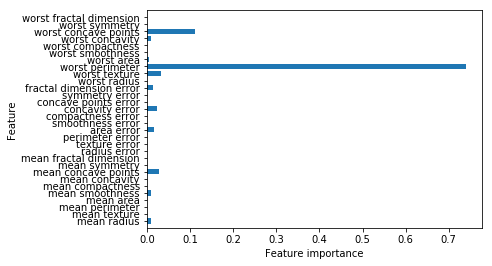

In [86]:
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), tree.feature_importances_,align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.ylim(-1,n_feature)
plt.show()

## Ensembles of Decision Trees
**Random forest**: build **independent** weak learners based on **bootstrap** sample of data (random select with replacement) and randomly selected **subset of features**. Results of each weak learner are weighted to come up with the final result.

**strength**: prevent overfitting compared to decision tree. Works well with large datasets. Training can be parallelized over many CPU cores.

**weakness**: doesn't work well with very high-dimensional, sparse data. Require more memory and time to train and predict than linear models.

**Gradient boosting machines**: trees are built sequencially based on the mistakes from previous ones. By default it has no randomness but with strong pre-pruning. **learning rate** controls how strong each tree tries to correct the previous ones.

**strength**: share all other trees strengths.

**weakness**: need careful tuning of parameters. Does not work well on high dimensional sparse data

In [100]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
forest = RandomForestClassifier(n_estimators=3, random_state=2)
forest.fit(X_train, y_train)

print("Acc on train set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Acc on test set: {:.3f}".format(forest.score(X_test, y_test)))

Acc on train set: 0.993
Acc on test set: 0.951


In [102]:
forest = RandomForestClassifier(n_estimators=10, random_state=2)
forest.fit(X_train, y_train)

print("Acc on train set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Acc on test set: {:.3f}".format(forest.score(X_test, y_test)))

Acc on train set: 1.000
Acc on test set: 0.972


In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [113]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.958


In [116]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1,learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.944
Accuracy on test set: 0.937


## Kernelized SVM
Adding interactions and polynomials (**nonlinearity**) of input features to bring it from low dimensional space to high dimensional space

**Radial basis function**: krbf(x1, x2) = exp (–ɣǁx1 - x2ǁ^2)
gamma works like 1/variance. Both gamma and C controls the complexity of the model.

**strength**: Allow complex decision boundaries even if data has only a few features. Works well on low-dimentional and high-dimentional data.
**weakness**: doesn't work well on large dataset and require careful preprocessing and tuning parameters. Hard to interpret and find the right kernel might be tricky.

In [139]:
from sklearn.svm import SVC,LinearSVC
X,y=make_blobs(centers=4,random_state=6)
X_new=np.hstack([X,X[:,1:]**2])
l_svm=LinearSVC().fit(X_new,y)

svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
svm.support_vectors_ # supported vectors
svm.dual_coef_.ravel() # class labels

array([ 0.44897186,  0.7940873 ,  0.79161349,  0.38986873,  0.28522452,
       -0.        , -1.66555476, -0.36716912, -0.67704203, -0.83846651,
       -0.24294005, -0.21957252, -0.46434472, -0.45681544, -0.4794918 ,
       -0.70321347, -0.32156156, -0.25963695, -0.41625493,  0.58597757,
        0.        ,  0.38109276,  0.66629957,  0.58876933,  0.20586871,
        0.66399051,  0.47376705,  0.68936352, -0.76612834, -0.22031389,
       -0.20259286, -0.42637878, -0.41757593, -0.42989361, -0.69437512,
       -0.23575002, -0.30143057, -0.29088424,  0.55524229,  0.        ,
        0.32316908,  0.73311908,  0.56862825,  0.20106161,  0.63065631,
        0.44256759,  0.67804804,  0.79144241,  0.08879064,  0.27319486,
        0.62043017,  0.38385134, -0.62474143, -0.75711634, -0.33314479,
       -0.18274652, -0.25996034])

In [ ]:
sv=svm.suppot